In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
!pip install wquantiles

In [4]:
from scipy.stats import trim_mean
import wquantiles

In [25]:
state = pd.read_csv('state.csv')

In [26]:
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [7]:
state['Population'].mean()

6162876.3

In [8]:
trim_mean(state['Population'], 0.1)

4783697.125

In [9]:
state['Population'].median()

4436369.5

In [10]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [11]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

- 가장 기본적인 위치 추정 기법은 평균이다. 하지만 극단값(특잇값)에 민감할 수 있다.
- 중간값, 절사평균과 같은 다른 방법들이 특잇값이나 이상 데이터에 덜 민감하므로 좀 더 로버스트하다.

용어정리
- 편차(deviation) : 관측값과 위치 추정값 사이의 차이(유이어 : 오차, 잔차)
- 분산(variation) : 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값. n은 데이터 개수(유의어 : 평균제곱오차)
- 표준편차(stadard deviation) : 분산의 제곱근
- 평균절대편차(mean absolute deviation) : 평균과의 편차의 절댓값의 평균
- 중간값의 중위절대편차(MAD, median absolute deviation from the median) : 중간값과의 편차의 절댓값의 중간값
- 범위(range) : 데이터의 최댓값과 최솟값의 차이
- 순서통계량(order statistics) : 최소에서 최대까지 정렬된 데이터 값에 따른 계량형(유의어: 순위)
- 백분위수(percentile) : 어떤 값들의 P퍼센트가 이 값 혹은 더 작은 값을 갖고, (100-P)퍼센트가 이 값 혹은 더 큰 값을 갖도록 하는 값(유의어 : 분위수)
- 사분위범위(IQR, interquartile rante) : 75번째 백분위수와 25번째 백분위수 사이의 차이

In [12]:
state['Population'].std()

6848235.347401142

In [13]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [17]:
from statsmodels import robust

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
robust.scale.mad(state['Population'])

3849876.1459979336

- 분산과 표준편차는 가장 보편적으로 널리 사용되는 변이 측정 방법이다.
- 이들 모두 특잇값에 민감하다.
- 중간값과 백분위수(분위수)로부터 평균절대편차와 중간값의 중위절대편차를 구하는 것이 좀 더 로버스트하다.

## 1.5 데이터 분포 탐색하기
- 상자그림(boxplot)
- 도수분포표(frequency table)
- 히스토그램(histogram)
- 밀도 그림(density plot)

###1.5.1 백분위수와 상자그림

In [19]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

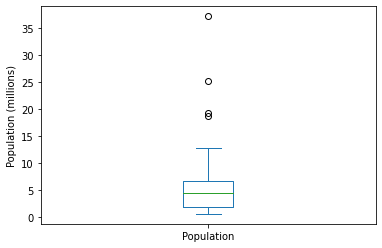

In [20]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

###1.5.2 도수분포표와 히스토그램

In [30]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Q) 왜 교재랑 다를까? 마지막 구간의 값은 인구의 max값이 아닌가?

In [27]:
state['Population'].max()

37253956

Text(0.5, 0, 'Population (million)')

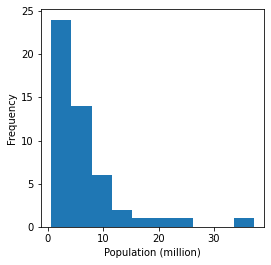

In [31]:
ax = (state['Population']/1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (million)')

###1.5.3 밀도 그림과 추정

Text(0.5, 0, 'Murder Rate (per 100,000)')

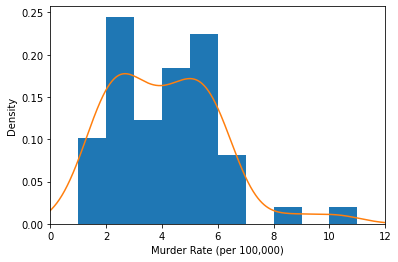

In [36]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

가장 큰 차이는 바로 y축 값의 단위이다. 밀도 그림에서는 개수가 아닌 비율을 표시한다. 밀도 곡선 아래의 총면적은 1이고 구간의 개수 대신 x축의 두 점 사이의 곡선 아래 면적을 계산하며, 이는 두 점 사이에 있는 분포의 비율에 해당한다.

## 1.6 이진데이터와 범주 데이터 탐색하기

- 최빈값(mode) : 데이터에서 가장 자주 등장하는 범주 혹은 값
- 기댓값(expected value) : 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률(probability)에 따른 평균

In [39]:
dfw = pd.read_csv('dfw_airline.csv')
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [40]:
dfw.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


Text(0, 0.5, 'Count')

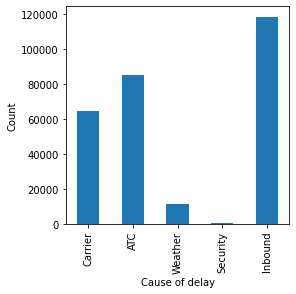

In [41]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')